In [1]:
# !pip install geopandas
# !pip install shapely

In [2]:
import gc
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
gdf = gpd.read_file('./Cleaned/USDM_2020.shp')

In [4]:
gdf.head()

,DM,Shape_Leng,Shape_Area,layer,date,geometry
0,0,5.290406e+07,1.090511e+12,USDM_20200107,"07 January, 2020","MULTIPOLYGON (((3035637.551 -2054754.639, 3035..."
1,1,2.251269e+07,6.363360e+11,USDM_20200107,"07 January, 2020","MULTIPOLYGON (((3159349.973 -1982198.834, 3160..."
2,2,8.760369e+06,2.426855e+11,USDM_20200107,"07 January, 2020","MULTIPOLYGON (((-270198.291 -1497286.046, -264..."
3,3,6.979721e+05,9.226889e+09,USDM_20200107,"07 January, 2020","MULTIPOLYGON (((-383208.046 -1211056.297, -368..."
4,4,2.864648e+04,3.624351e+07,USDM_20200107,"07 January, 2020","POLYGON ((-5860708.526 -292051.252, -5860509.7..."


In [5]:
gdf.set_index('date', inplace=True)

In [6]:
plt.rcParams['figure.figsize'] = 30, 30
plt.rcParams['figure.dpi'] = 300

In [7]:
usa_shape = gpd.read_file('USA Boundary/State Boundary.shp')

(-3000000.0, 3000000.0, -3000000.0, 3000000.0)

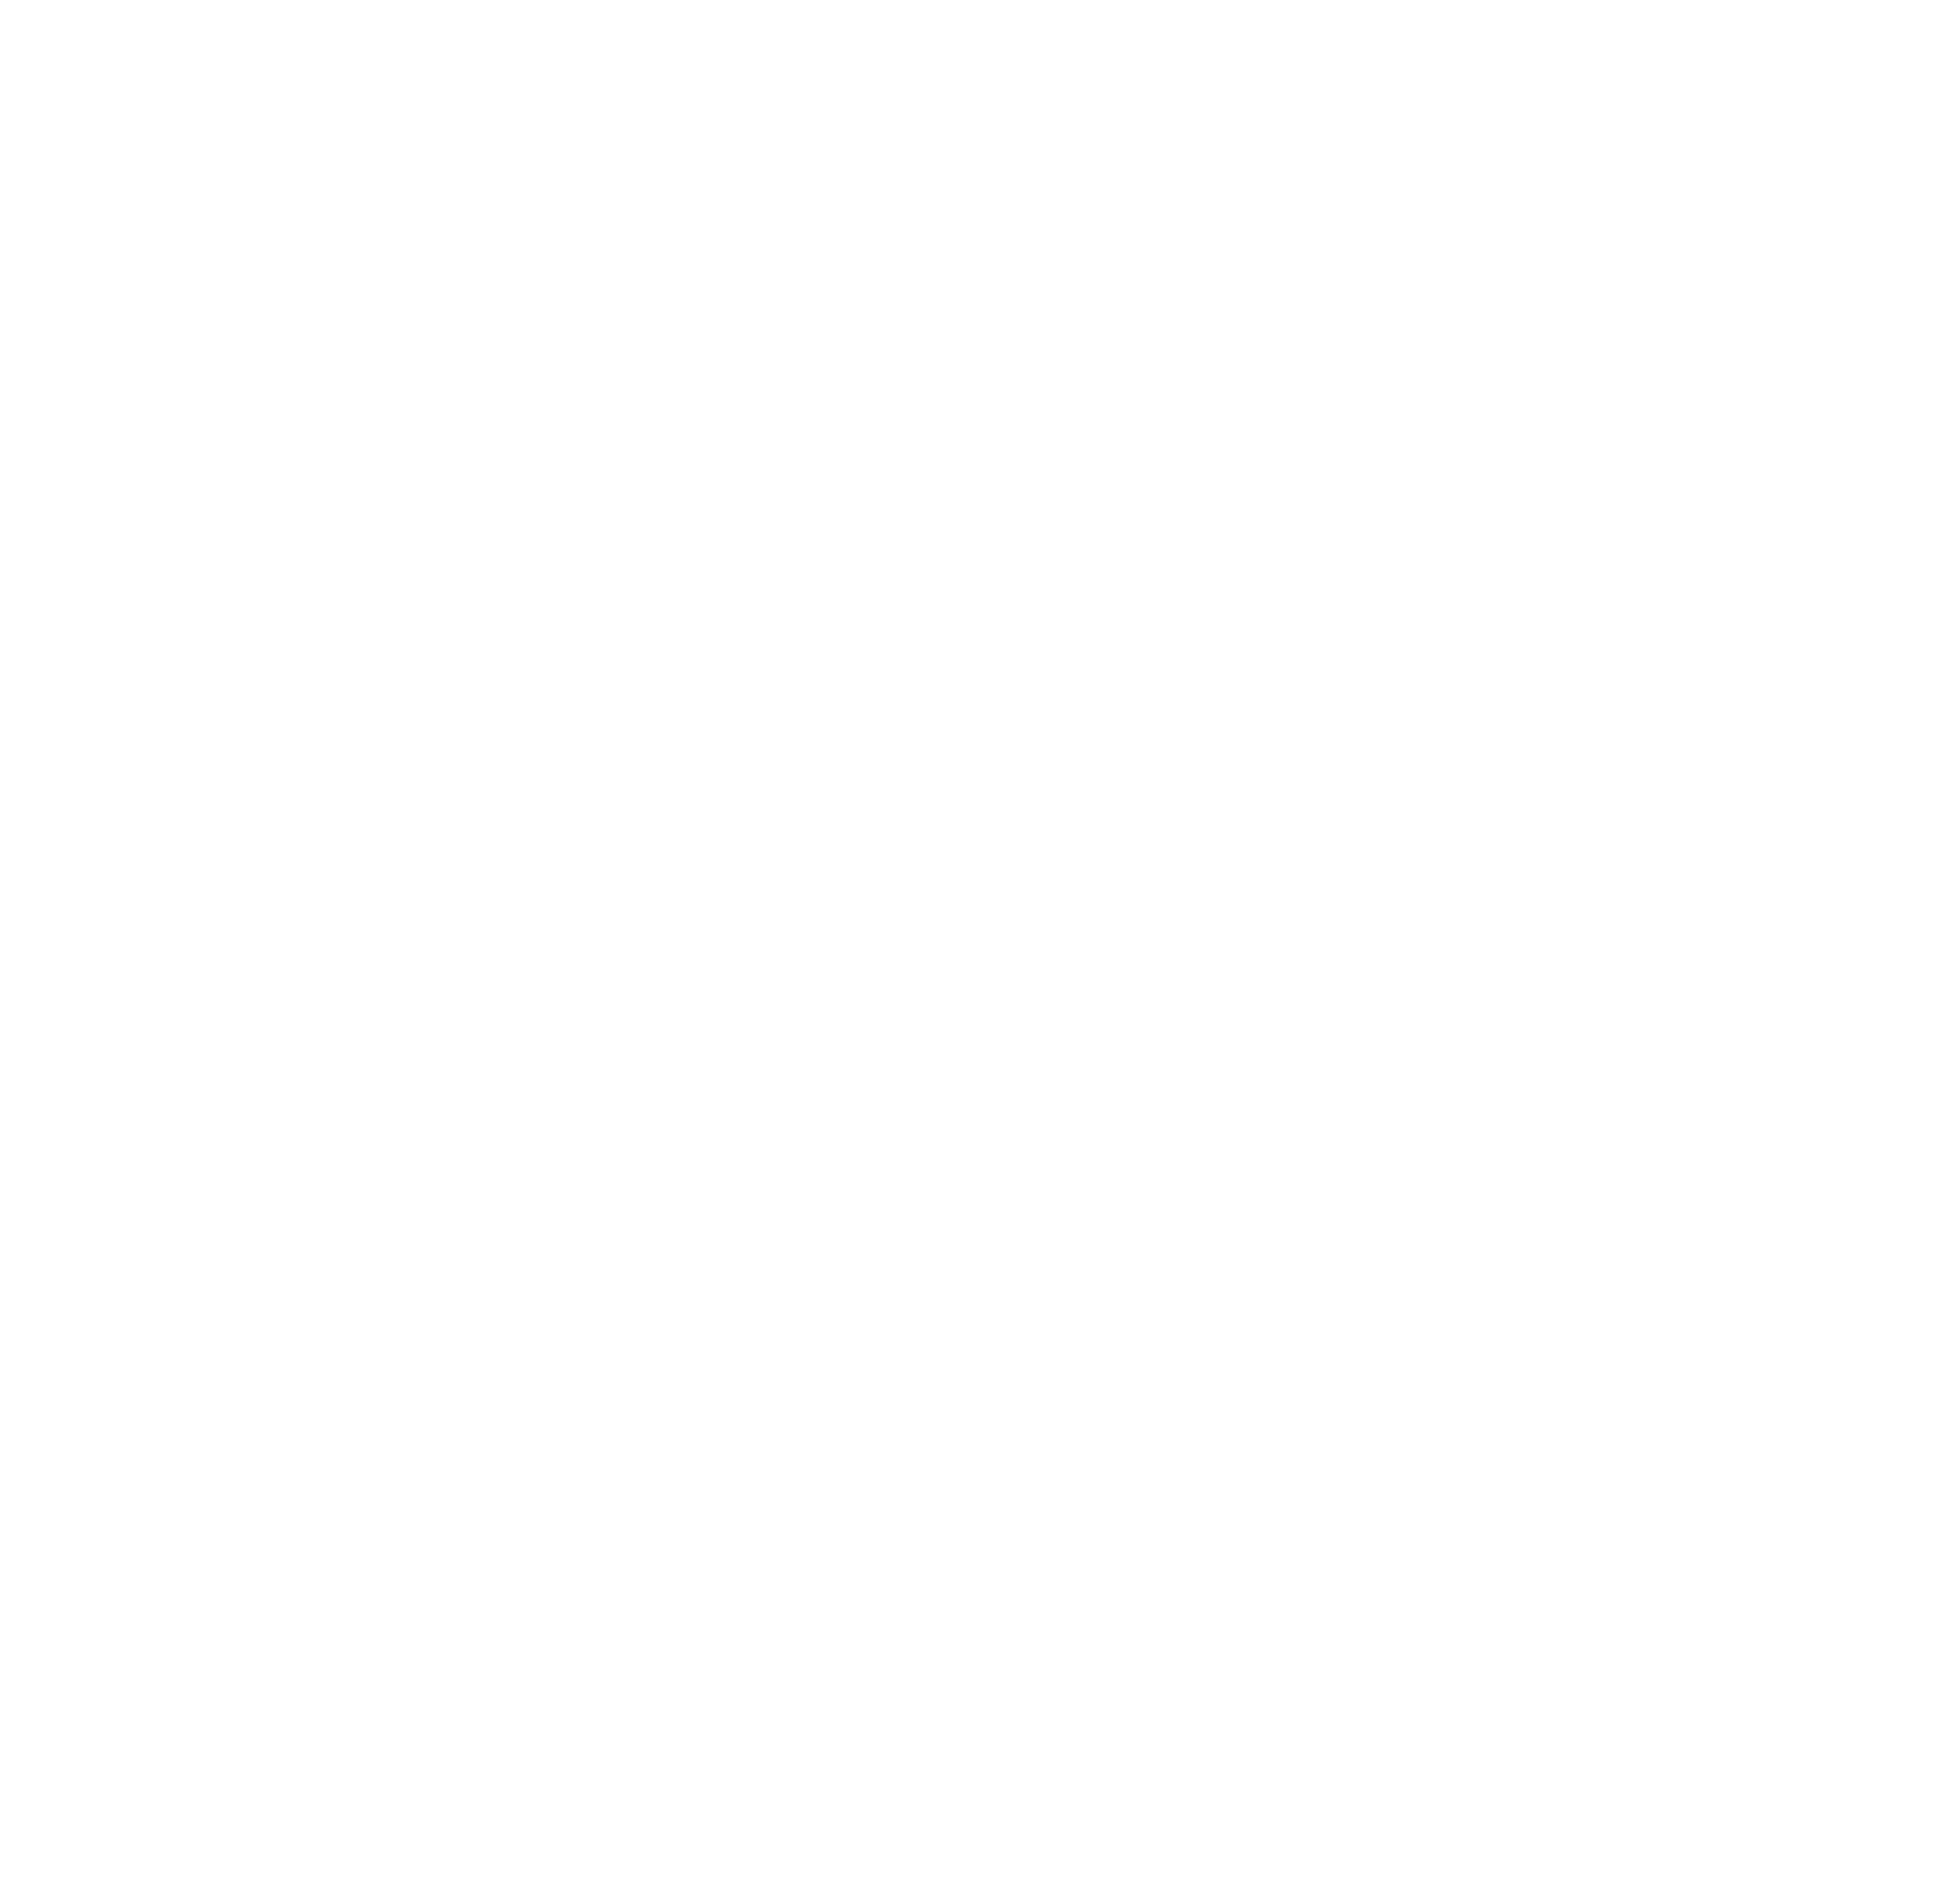

In [8]:
fig, ax = plt.subplots(figsize=(30, 30))
ax.set_xlim(-3e6, 3e6)
ax.set_ylim(-3e6, 3e6)
ax.axis('off')

In [9]:
usa_shape.plot(ax=ax, facecolor='#e7e7e7', edgecolor='none')

<AxesSubplot:>

<Figure size 9000x9000 with 0 Axes>

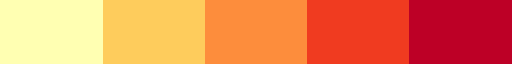

In [10]:
colors = ['#ffffb2', '#fecc5c', '#fd8d3c', '#f03b20', '#bd0026']
my_cmap = ListedColormap(colors, 'my_colors')
my_cmap

In [11]:
gdf.plot(ax=ax, column='DM', cmap = my_cmap)

<AxesSubplot:>

<Figure size 9000x9000 with 0 Axes>

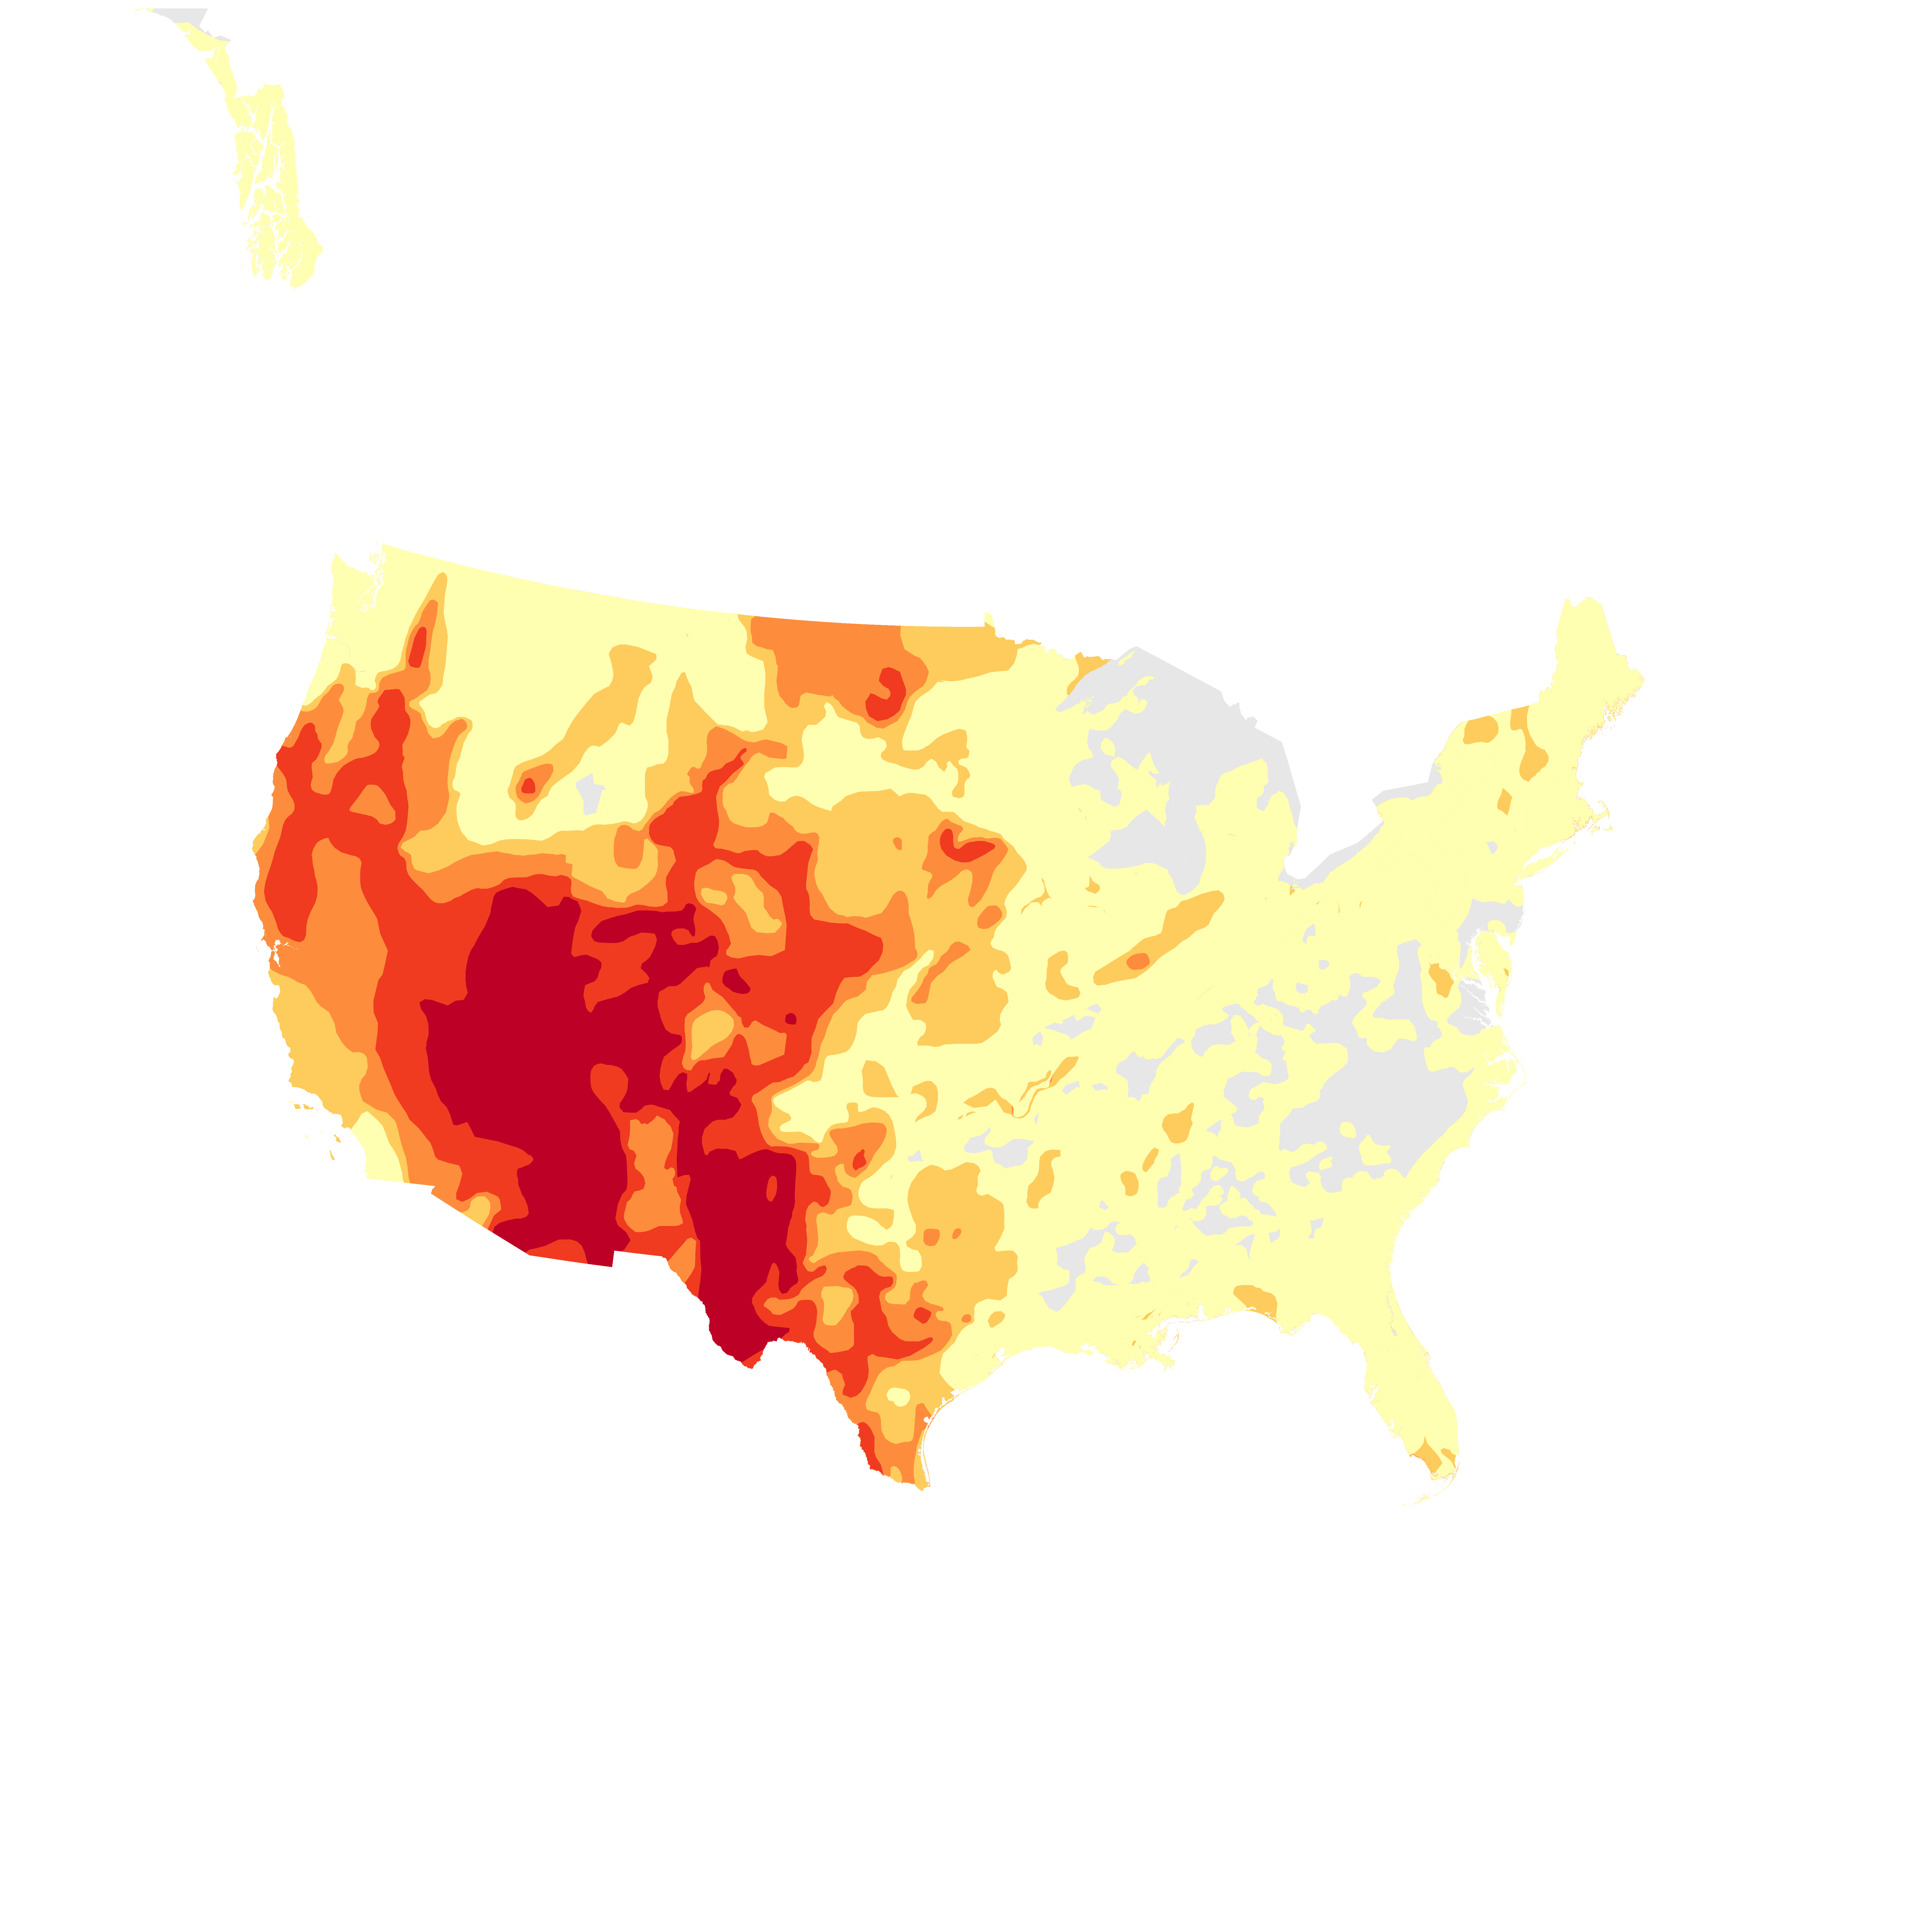

In [12]:
fig

# Defining a function for resuability

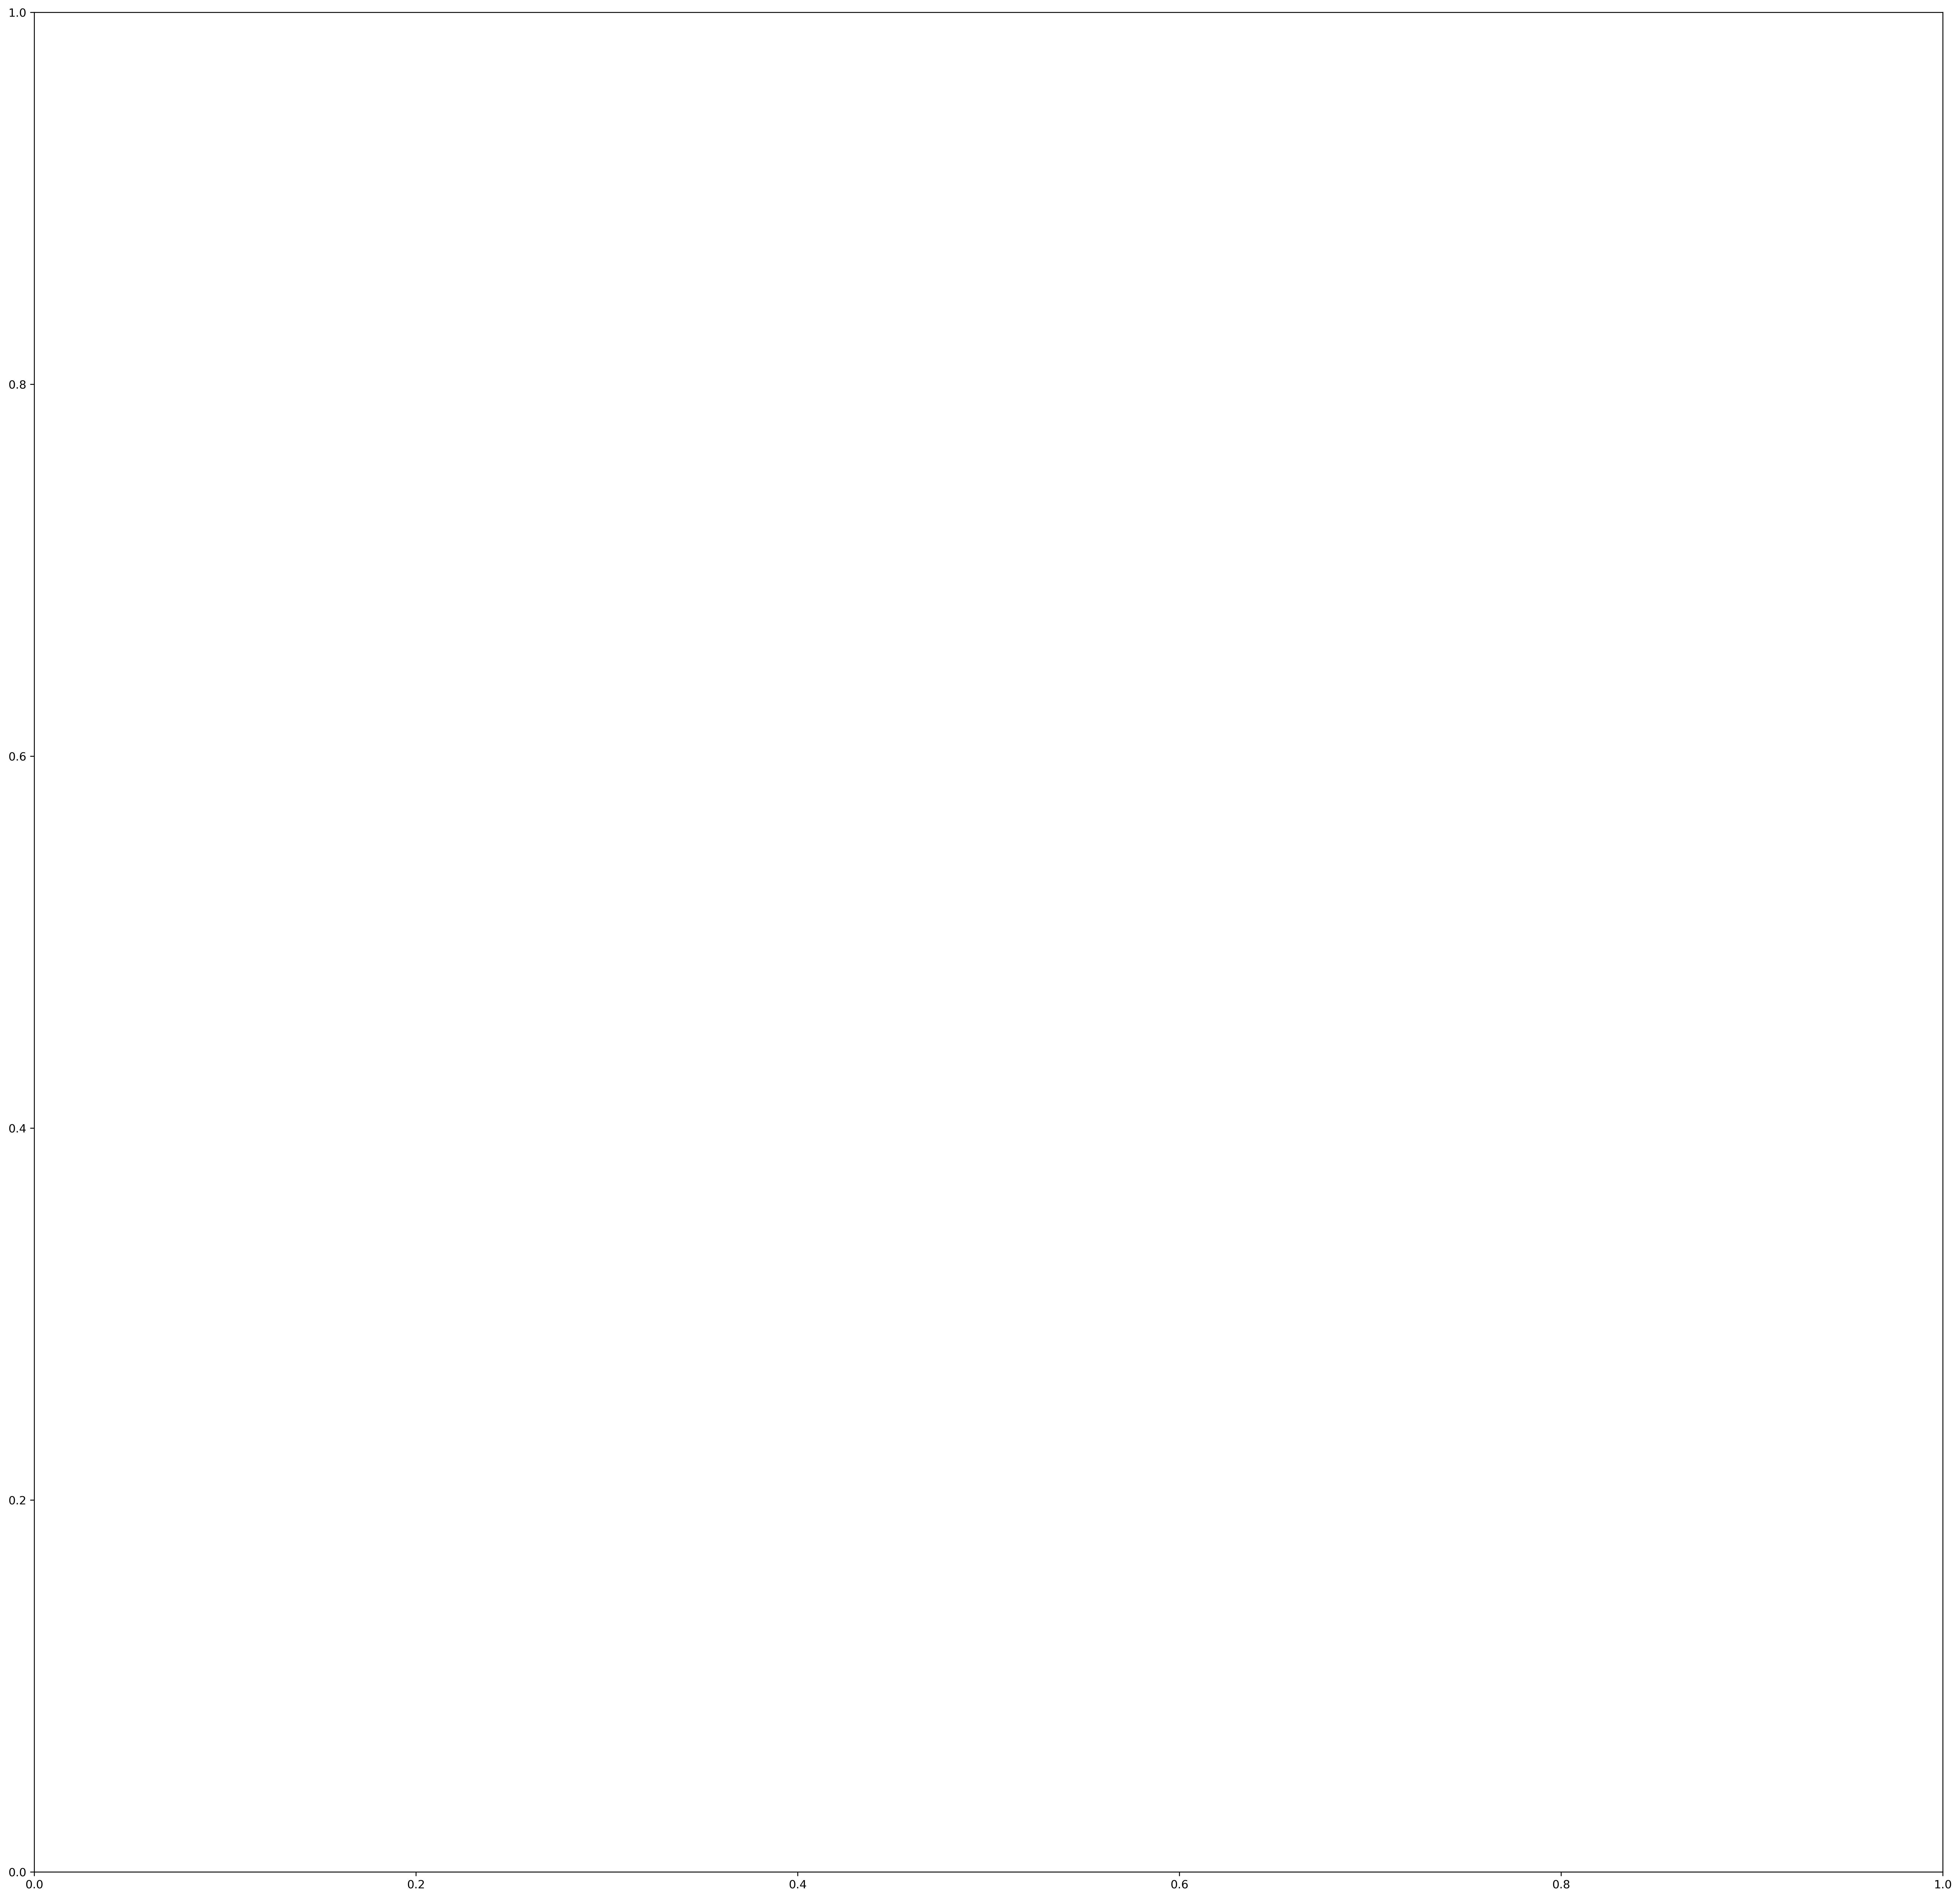

In [13]:
plt.rcParams['figure.figsize'] = 30, 30
plt.rcParams['figure.dpi'] = 300


usa_shape = gpd.read_file('USA Boundary/State Boundary.shp')
gdf = gpd.read_file('./Cleaned/USDM_2020.shp')

gdf.set_index('date', inplace=True)
date_groups = gdf.groupby('date')

colors = ['#ffffb2', '#fecc5c', '#fd8d3c', '#f03b20', '#bd0026']
my_cmap = ListedColormap(colors, 'my_colors')

fig, ax = plt.subplots(figsize=(30, 30))

def drought_map(basemap, gdf, date):
    ax.cla()
    ax.set_xlim(-3e6, 3e6)
    ax.set_ylim(-3e6, 3e6)
    ax.axis('off')
    usa_shape.plot(ax=ax, facecolor='#e7e7e7', edgecolor='none')
    date_groups.get_group(date).plot(ax=ax, column='DM', cmap = my_cmap)
    usa_shape.plot(ax=ax,facecolor="none", edgecolor="white")
    return fig.savefig(f"{date}.jpg")

In [14]:
all_dates = gdf.index.unique()
all_dates

Index(['07 January, 2020', '14 January, 2020', '21 January, 2020',
       '28 January, 2020', '04 February, 2020', '11 February, 2020',
       '18 February, 2020', '25 February, 2020', '03 March, 2020',
       '10 March, 2020', '17 March, 2020', '24 March, 2020', '31 March, 2020',
       '07 April, 2020', '14 April, 2020', '21 April, 2020', '28 April, 2020',
       '05 May, 2020', '12 May, 2020', '19 May, 2020', '26 May, 2020',
       '02 June, 2020', '09 June, 2020', '16 June, 2020', '23 June, 2020',
       '30 June, 2020', '07 July, 2020', '14 July, 2020', '21 July, 2020',
       '28 July, 2020', '04 August, 2020', '11 August, 2020',
       '18 August, 2020', '25 August, 2020', '01 September, 2020',
       '08 September, 2020', '15 September, 2020', '22 September, 2020',
       '29 September, 2020', '06 October, 2020', '13 October, 2020',
       '20 October, 2020', '27 October, 2020', '03 November, 2020',
       '10 November, 2020', '17 November, 2020', '24 November, 2020',
       '0

In [15]:
os.chdir('./Plots')
os.getcwd()

'D:\\My Codes\\Drought Monitor\\Plots'

In [16]:
for date in all_dates:
  drought_map(usa_shape, gdf, date)
  gc.collect()

<Figure size 9000x9000 with 0 Axes>